# Classify customer segment using KMeans

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.cluster import KMeans

In [65]:
path = "C:\\Users\\User\\Downloads\\customer-segmentation-dataset\\customer-segmentation-dataset\\Mall_Customers.csv"

In [66]:
data = pd.read_csv(path)

In [67]:
data.set_index('CustomerID', inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


<Figure size 720x432 with 0 Axes>

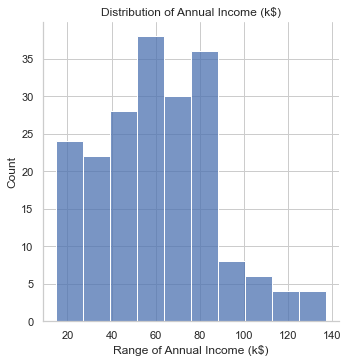

In [68]:
plt.figure(figsize = (10,6))
sns.set(style = 'whitegrid')
sns.displot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
plt.show()

<AxesSubplot:>

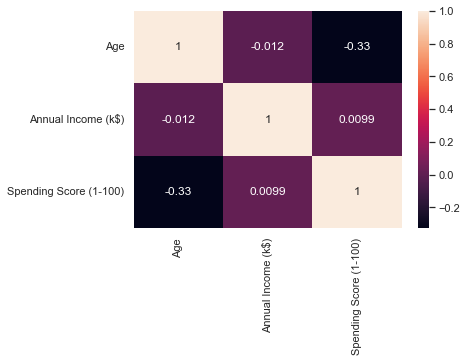

In [69]:
sns.heatmap(data.corr(), annot=True)

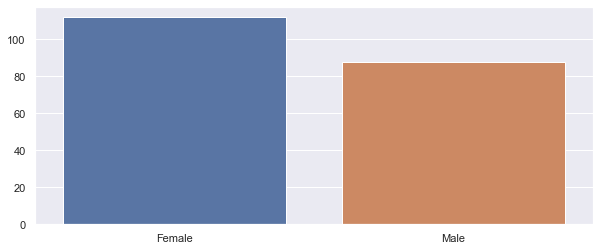

In [70]:
genders = data["Gender"].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize = (10, 4))
sns.barplot(x = genders.index, y = genders.values)
plt.show()

In [71]:
X = data.drop('Gender', axis = 1)

c:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


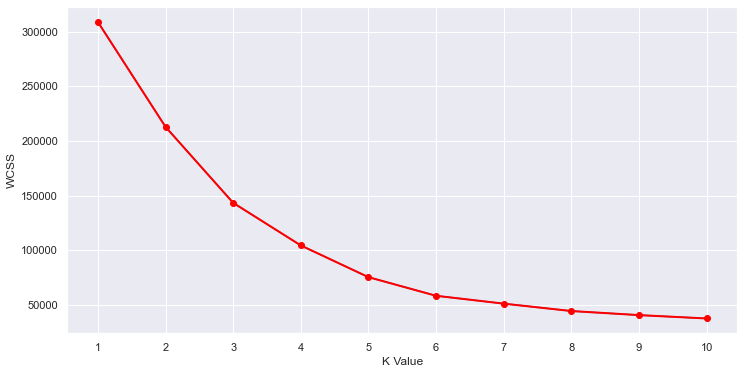

In [72]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i)
    km.fit(X)
    wcss.append(km.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = "o")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS")
plt.show()


In [73]:
#Taking 5 clusters
km1 = KMeans(n_clusters = 5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y = km1.predict(X)
#adding the labels to a column named label
data["label"] = y
#The new dataframe with the clustering done
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
CustomerID,,,,,
1,Male,19,15,39,0
2,Male,21,15,81,2
3,Female,20,16,6,0
4,Female,23,16,77,2
5,Female,31,17,40,0


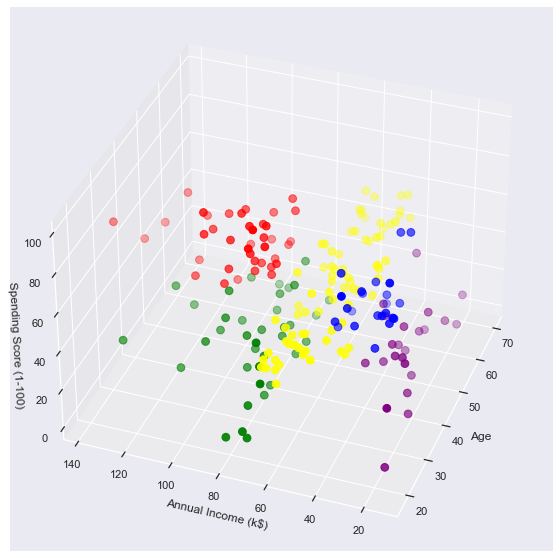

In [74]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label == 0], data["Annual Income (k$)"][data.label == 0], data["Spending Score (1-100)"][data.label == 0], c='purple', s=60)
ax.scatter(data.Age[data.label == 1], data["Annual Income (k$)"][data.label == 1], data["Spending Score (1-100)"][data.label == 1], c='red', s=60)
ax.scatter(data.Age[data.label == 2], data["Annual Income (k$)"][data.label == 2], data["Spending Score (1-100)"][data.label == 2], c='blue', s=60)
ax.scatter(data.Age[data.label == 3], data["Annual Income (k$)"][data.label == 3], data["Spending Score (1-100)"][data.label == 3], c='green', s=60)
ax.scatter(data.Age[data.label == 4], data["Annual Income (k$)"][data.label == 4], data["Spending Score (1-100)"][data.label == 4], c='yellow', s=60)
ax.view_init(35, 200)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()